<a class="anchor" id="0.1"></a>
# **Table of Contents**
1. [Introduction](#1)
2. [Business Understanding](#2)
3. [Data Understanding](#3)
4. [Data Preperation](#4)
5. [Modeling](#5)
6. [Evaluation](#6)
7. [Improvements](#7)
8. [Conclusion](#8)

# **1. Introduction** <a class="anchor" id="1"></a>
[Table of Contents](#0.1)

This notebook will explore k Nearest Neighbour by going through the CRISP-DM process. The goal is to gain insight of how to use k-NN in Python and its usefulness.

# **2. Business Understanding** <a class="anchor" id="2"></a>
[Table of Contents](#0.1)

The dataset I will be using for this notebook is the [Fracture Classification Dataset](https://www.kaggle.com/datasets/akshayramakrishnan28/fracture-classification-dataset/data). Specifically, I will be using the classified images for whether a scan depicts a fracture or non-fractured x-ray.

Because the data is already classified, it should be easy to work with. In total there are a little over 4000 images, which will hopefully be enough to train the model.

# **3. Data Understanding** <a class="anchor" id="3"></a>
[Table of Contents](#0.1)

Because we are working with images, we will have to make sure to flatten them when we store them for processing. Otherwise, our images are already labelled, making the data processing step easier.

In [1]:
# This library will help us access our files
try:
    import os
except:
    !pip install os
    import os

# This library is for data processing, and CSV file I/O
try:
    import pandas as pd
except:
    !pip install pandas
    import pandas as pd
    
# This library is for image processing
try:
    import cv2
except:
    !pip install opencv-python
    import cv2
    
try:
    import numpy as np
except:
    !pip install numpy
    import numpy as np
    
def load_images(filepath, label):
    images = []
    for file in os.listdir(filepath):
        image = cv2.imread(os.path.join(filepath,file))
        image = cv2.resize(image, [128,128])
        flattened_image = image.flatten() #flatten the image so that it is one-dimensional
        images.append(flattened_image)
    return np.array(images), [label] * len(images)

The code above takes the filepath to the images and iterates through them. using `cv2`, the images are read and resized to ensure they all take up the same size in the array. The images are then flattened so that they can be read by the machine learning algorithm.

In [2]:
current_working_directory = os.getcwd()
fracturedFiles = os.path.join(current_working_directory, 'input', 'Fractured')
nonFracturedFiles = os.path.join(current_working_directory, 'input', 'Non_fractured')

Fracture_images, fracture_labels = load_images(fracturedFiles, 'Fractured')
NonFracture_images, NonFracture_labels = load_images(nonFracturedFiles,'Non-Fractured')

df = pd.DataFrame({
    'images': Fracture_images.tolist() + NonFracture_images.tolist(),
    'fractured': np.concatenate([fracture_labels, NonFracture_labels])
})

df = df.sample(frac=1)

The code above uses the load_images method defined in the previous code block, and is provided with the filepath for the fractured images, and the non fractured images. The resulting arrays are combined together and added into a dataframe alongside the labels. The datarame is then shuffled to ensure the fractured and non fractured images are mixed.

In [3]:
df.shape

(4083, 2)

Now that we've imported all of our data, we can see that we are working with 4083 images, and 2 attributes (images and fractured).

# **4. Data Preperation** <a class="anchor" id="4"></a>
[Table of Contents](#0.1)

Because we are working with pre-categorized images, we know that there are no missing values. As such, we can jump straight into assigning our target variable.

In [4]:
targetVariable = 'fractured'

X = df.drop([targetVariable], axis=1)

y = df[targetVariable]

Next, we will split our data into training and test sets.

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
X_train = X_train["images"].tolist()
X_test = X_test["images"].tolist()

# **5. Modeling** <a class="anchor" id="5"></a>
[Table of Contents](#0.1)

In [6]:
from sklearn.neighbors import KNeighborsClassifier
k_neighbors = 3 #the number of neighbors that will be checked for proximity
knn_model = KNeighborsClassifier(k_neighbors)

knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [7]:
# predict the results using the model
y_pred = knn_model.predict(X_test)
y_pred

array(['Non-Fractured', 'Non-Fractured', 'Non-Fractured', ...,
       'Non-Fractured', 'Non-Fractured', 'Non-Fractured'], dtype=object)

# **6. Evaluation** <a class="anchor" id="6"></a>
[Table of Contents](#0.1)

In [8]:
try:
    from sklearn.metrics import accuracy_score
except:
    !pip install sklearn
    from sklearn.metrics import accuracy_score

y_pred_train = knn_model.predict(X_train)
    
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Model accuracy score: 0.8261
Training-set accuracy score: 0.8786


The training-set accuracy score is 0.8220 while the test-set accuracy is 0.8898. The two values differ by about 8%, which is indicative of overfitting. This could be due to a low k value, which is the number of nearest neighbors used to determine what classification an image belongs to. 

In [9]:
# return the most frequent value
most_frequent = (y_test == "Fractured").sum() if (y_test == "Fractured").sum() >= (y_test == "Non-Fractured").sum() else (y_test == "Non-Fractured").sum()

null_accuracy = most_frequent/len(y_test)
print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.8286


Ou model accuracy score is 0.8220 but our null accuracy is 0.8310. This means that our k-NN model is not doing a very good job predicting the classes, as it lower than the null accuracy.

### Confusion matrix

A confusion matrix is a tool for summarizing the performance of a classification algorithm. A confusion matrix will give us a clear picture of classification model performance and the types of errors produced by the model. It gives us a summary of correct and incorrect predictions broken down by each category. The summary is represented in a tabular form.


Four types of outcomes are possible while evaluating a classification model performance. These four outcomes are described below:-


**True Positives (TP)** – True Positives occur when we predict an observation belongs to a certain class and the observation actually belongs to that class.


**True Negatives (TN)** – True Negatives occur when we predict an observation does not belong to a certain class and the observation actually does not belong to that class.


**False Positives (FP)** – False Positives occur when we predict an observation belongs to a    certain class but the observation actually does not belong to that class. This type of error is called **Type I error.**



**False Negatives (FN)** – False Negatives occur when we predict an observation does not belong to a certain class but the observation actually belongs to that class. This is a very serious error and it is called **Type II error.**



These four outcomes are summarized in a confusion matrix given below.

#### from Phrashant Banerjee [Naive Bayes Classifier in Python](https://www.kaggle.com/code/prashant111/naive-bayes-classifier-in-python)

In [10]:
# Print the Confusion Matrix and slice it into four pieces

try:
    from sklearn.metrics import confusion_matrix
except:
    !pip install sklearn
    from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[ 43 167]
 [ 46 969]]

True Positives(TP) =  43

True Negatives(TN) =  969

False Positives(FP) =  167

False Negatives(FN) =  46


The confusion matrix shows `52 + 948 = 100 correct predictions` and `175 + 50 = 225 incorrect predictions`.


In this case, we have


- `True Positives` (Actual Positive:1 and Predict Positive:1) - 52


- `True Negatives` (Actual Negative:0 and Predict Negative:0) - 948


- `False Positives` (Actual Negative:0 but Predict Positive:1) - 175 `(Type I error)`


- `False Negatives` (Actual Positive:1 but Predict Negative:0) - 50 `(Type II error)`

<Axes: >

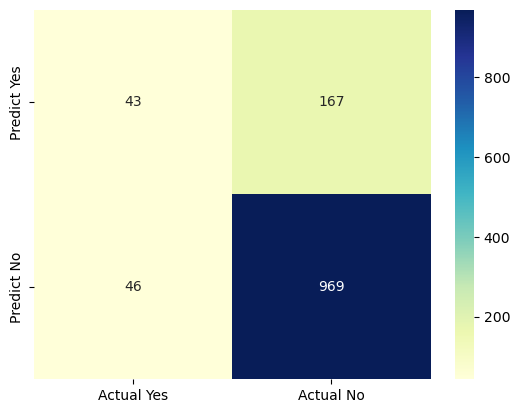

In [11]:
# visualize confusion matrix with seaborn heatmap

try:
    import seaborn as sns # for statistical data visualization
except:
    !pip install seaborn
    import seaborn as sns # for statistical data visualization


cm_matrix = pd.DataFrame(data=cm, columns=['Actual Yes', 'Actual No'], 
                                 index=['Predict Yes', 'Predict No'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

### Classification Report


**Classification report** is another way to evaluate the classification model performance. It displays the  **precision**, **recall**, **f1** and **support** scores for the model.

We can print a classification report as follows:-
#### from Phrashant Banerjee [Naive Bayes Classifier in Python](https://www.kaggle.com/code/prashant111/naive-bayes-classifier-in-python)

In [12]:
try:
    from sklearn.metrics import classification_report
except:
    !pip install sklearn
    from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

               precision    recall  f1-score   support

    Fractured       0.48      0.20      0.29       210
Non-Fractured       0.85      0.95      0.90      1015

     accuracy                           0.83      1225
    macro avg       0.67      0.58      0.59      1225
 weighted avg       0.79      0.83      0.80      1225



### Accuracy
**Accuracy** measures the overall correctness of the predictions. It is a general indicator of how well the model is performing.

Mathematically, accuracy can be defined as the ratio of `(TP + FP) to (TP + FP + FN + TN)`

### Precision


**Precision** can be defined as the percentage of correctly predicted positive outcomes out of all the predicted positive outcomes. It can be given as the ratio of true positives (TP) to the sum of true and false positives (TP + FP). 


So, **Precision** identifies the proportion of correctly predicted positive outcome. It is more concerned with the positive class than the negative class.



Mathematically, precision can be defined as the ratio of `TP to (TP + FP)`.
#### from Phrashant Banerjee [Naive Bayes Classifier in Python](https://www.kaggle.com/code/prashant111/naive-bayes-classifier-in-python)

### Recall


Recall can be defined as the percentage of correctly predicted positive outcomes out of all the actual positive outcomes.
It can be given as the ratio of true positives (TP) to the sum of true positives and false negatives (TP + FN). **Recall** is also called **Sensitivity**.


**Recall** identifies the proportion of correctly predicted actual positives.


Mathematically, recall can be given as the ratio of `TP to (TP + FN)`.
#### from Phrashant Banerjee [Naive Bayes Classifier in Python](https://www.kaggle.com/code/prashant111/naive-bayes-classifier-in-python)

### Specificity

**Specificity** represents the propertion of correctly identified actual negatives. It helps us understand how well the model can idenitfy instances that don't belong the the positive class. High specificity is indicative that the model is good at avoiding false positives. Low specificity is indicative that the model is misclassifying negative instances as positive.

Mathematically, specificity can be given as the ratio of `TN to (TN + FP)`

### Negative Predictive Value (NPV)
**NPV** asses the likelihood that a negative prediction is correct. High NPV indicates the model is correctly idenitfying true negatives. Low NPV indicates the model is missclassifying negative instances.

Mathematically, NPV can be given as the ratio of `TN to (TN + FN)`

### f1-score


**f1-score** is the weighted harmonic mean of precision and recall. The best possible **f1-score** would be 1.0 and the worst 
would be 0.0.  **f1-score** is the harmonic mean of precision and recall. So, **f1-score** is always lower than accuracy measures as they embed precision and recall into their computation. The weighted average of `f1-score` should be used to 
compare classifier models, not global accuracy.

Mathematically, f1-score can be given by the following formula: `2 x (Percision x Recall)/(Precision + Recall)`

#### from Phrashant Banerjee [Naive Bayes Classifier in Python](https://www.kaggle.com/code/prashant111/naive-bayes-classifier-in-python)

In [13]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

precision = TP / float(TP + FP)
recall = TP / float(TP + FN)
specificity = TN / (TN + FP)
negative_predictive_value = TN / (TN + FN)
accuracy = (TP + TN) / float(TP + TN + FP + FN)
f1_score = 2*((precision * recall) / (precision + recall))
balanced_accuracy = (recall + specificity) / 2

print('Accuracy : {0:0.4f}'.format(accuracy))
print('Precision : {0:0.4f}'.format(precision))
print('Recall: {0:0.4f}'.format(recall))
print('Specificity : {0:0.4f}'.format(specificity))
print('NPV: {0:0.4f}'.format(negative_predictive_value))
print('F1 Score: {0:0.4f}'.format(f1_score))
print('Balanced Accuracy: {0:0.4f}'.format(balanced_accuracy))

Accuracy : 0.8261
Precision : 0.2048
Recall: 0.4831
Specificity : 0.8530
NPV: 0.9547
F1 Score: 0.2876
Balanced Accuracy: 0.6681


# **7. Improvements** <a class="anchor" id="7"></a>
[Table of Contents](#0.1)

Now that we've evaluated our model, we can reflect on our result and see if there are any improvements to be made.

At first glance, a `82.2%` accuracy may seem promising. However, our precision, recall, and F1 Score is quite low. We can see from our confusion matrix that our model is quite good at predicting non-fracture images. However, is it not very good at identifying fractures, which is concerning since we want our model to be good at identifying fractures first and foremost. This is likely because our dataset does not contain enough images with fractures (717 out of a total of 4083, only 17%!!!). To solve this, we can sample our dataset to train on an equal amount of fractured and non-fractured images. Alternatively, we can try to obtain a higher amount of fractured images, which would require additional data collection. 

Another problem may be related to the resizing of the images. Many of the images are 2000 pixels in the x and y direction, and they are being resized to 128x128. There is likely a lot of detail being lost in the image, hindering the model's ability to properly identify fractures.

To improve our model, we will trying increasing the amount of pixels the images are resized to.

### Hardware Limitations
When working with large datasets, there may be hardware limitations when loading data into memory. In this case, the size of the image is such that large amounts of memory is needed. In my case, I was able to load the images at size 750x750, but 1000x1000 would cause a memory error. My machine has 16GB of memory, so you may need to modfiy the pixels based on your hardware.

In [14]:
def load_images(filepath, label):
    images = []
    for file in os.listdir(filepath):
        image = cv2.imread(os.path.join(filepath,file))
        image = cv2.resize(image, [700,700])
        flattened_image = image.flatten() #flatten the image so that it is one-dimensional
        images.append(flattened_image)
        if(len(images) == 717):
            break
    return np.array(images), [label] * len(images)

Next, we will attempt to pull an even amount of fractured and non-fractured images. Because our dataset comprises of mostly non-fractured images, we can try and pull an even amount of images as the count of fractured images.

In [15]:
Fracture_images, fracture_labels = load_images(fracturedFiles, 'Fractured')
NonFracture_images, NonFracture_labels = load_images(nonFracturedFiles,'Non-Fractured')

Fracture_images.shape, NonFracture_images.shape

((717, 1470000), (717, 1470000))

Now using our modified load_images method, we have an equal amount of fractured and non-fractured images. The images are also bigger, which will hopefully improve our model

In [16]:
allImages = Fracture_images.tolist() + NonFracture_images.tolist()

In [17]:
df = pd.DataFrame({
    'images': allImages,
    'fractured': np.concatenate([fracture_labels, NonFracture_labels])
})

df = df.sample(frac=1)
df.shape

(1434, 2)

In [18]:
targetVariable = 'fractured'

X = df.drop([targetVariable], axis=1)

y = df[targetVariable]

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state = 0)
X_train = X_train["images"].tolist()
X_test = X_test["images"].tolist()

In [20]:
from sklearn.neighbors import KNeighborsClassifier
k_neighbors = 7 #the number of neighbors that will be checked for proximity
knn_model = KNeighborsClassifier(k_neighbors)

knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [21]:
# predict the results using the model
y_pred = knn_model.predict(X_test)
y_pred

array(['Non-Fractured', 'Non-Fractured', 'Fractured', 'Non-Fractured',
       'Fractured', 'Fractured', 'Non-Fractured', 'Fractured',
       'Fractured', 'Fractured', 'Fractured', 'Non-Fractured',
       'Non-Fractured', 'Non-Fractured', 'Non-Fractured', 'Fractured',
       'Fractured', 'Non-Fractured', 'Fractured', 'Non-Fractured',
       'Fractured', 'Non-Fractured', 'Non-Fractured', 'Non-Fractured',
       'Non-Fractured', 'Non-Fractured', 'Fractured', 'Non-Fractured',
       'Non-Fractured', 'Non-Fractured', 'Fractured', 'Fractured',
       'Non-Fractured', 'Fractured', 'Non-Fractured', 'Non-Fractured',
       'Non-Fractured', 'Non-Fractured', 'Non-Fractured', 'Fractured',
       'Non-Fractured', 'Fractured', 'Non-Fractured', 'Fractured',
       'Non-Fractured', 'Non-Fractured', 'Fractured', 'Fractured',
       'Fractured', 'Fractured', 'Non-Fractured', 'Fractured',
       'Fractured', 'Fractured', 'Fractured', 'Non-Fractured',
       'Non-Fractured', 'Non-Fractured', 'Non-Fracture

In [22]:
try:
    from sklearn.metrics import accuracy_score
except:
    !pip install sklearn
    from sklearn.metrics import accuracy_score

y_pred_train = knn_model.predict(X_train)

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Model accuracy score: 0.6806
Training-set accuracy score: 0.7490


In [36]:
# return the most frequent value
most_frequent = (y_test == "Fractured").sum() if (y_test == "Fractured").sum() >= (y_test == "Non-Fractured").sum() else (y_test == "Non-Fractured").sum()

null_accuracy = most_frequent/len(y_test)
print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.5146


In [23]:
# Print the Confusion Matrix and slice it into four pieces

try:
    from sklearn.metrics import confusion_matrix
except:
    !pip install sklearn
    from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[235 123]
 [106 253]]

True Positives(TP) =  235

True Negatives(TN) =  253

False Positives(FP) =  123

False Negatives(FN) =  106


<Axes: >

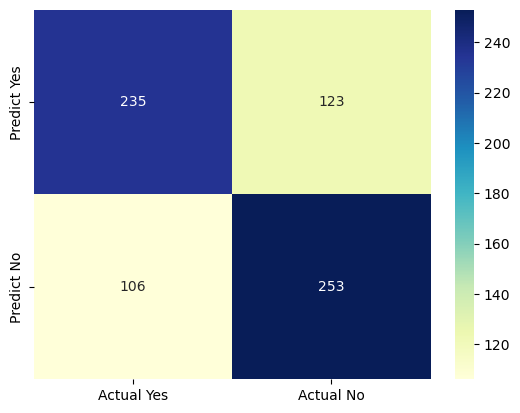

In [24]:
# visualize confusion matrix with seaborn heatmap

try:
    import seaborn as sns # for statistical data visualization
except:
    !pip install seaborn
    import seaborn as sns # for statistical data visualization


cm_matrix = pd.DataFrame(data=cm, columns=['Actual Yes', 'Actual No'], 
                                 index=['Predict Yes', 'Predict No'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [25]:
try:
    from sklearn.metrics import classification_report
except:
    !pip install sklearn
    from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

               precision    recall  f1-score   support

    Fractured       0.69      0.66      0.67       358
Non-Fractured       0.67      0.70      0.69       359

     accuracy                           0.68       717
    macro avg       0.68      0.68      0.68       717
 weighted avg       0.68      0.68      0.68       717



In [26]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

precision = TP / float(TP + FP)
recall = TP / float(TP + FN)
specificity = TN / (TN + FP)
negative_predictive_value = TN / (TN + FN)
accuracy = (TP + TN) / float(TP + TN + FP + FN)
f1_score = 2*((precision * recall) / (precision + recall))
balanced_accuracy = (recall + specificity) / 2

print('Accuracy : {0:0.4f}'.format(accuracy))
print('Precision : {0:0.4f}'.format(precision))
print('Recall: {0:0.4f}'.format(recall))
print('Specificity : {0:0.4f}'.format(specificity))
print('NPV: {0:0.4f}'.format(negative_predictive_value))
print('F1 Score: {0:0.4f}'.format(f1_score))
print('Balanced Accuracy: {0:0.4f}'.format(balanced_accuracy))

Accuracy : 0.6806
Precision : 0.6564
Recall: 0.6891
Specificity : 0.6729
NPV: 0.7047
F1 Score: 0.6724
Balanced Accuracy: 0.6810


Looking at our results, at first glance, it may seem our new model is worse than our previous one. Our accuracy is reduced to 68% vs 83%. However, our new model is better trained overall, with a massive increase in precision by 45%, and all other metrics higher overall. Our model accuracy is also much higher than our null accuracy.

In spite of all of this, 68% is still too low to be usable. To improve our model, we would likely need one of two things: more images, higher pixel count, and a higher k-value. However, we are currently running into RAM limitations, so further improvement of the model by increasing the dataset is not feasible at this time.

# **9. Conclusion** <a class="anchor" id="9"></a>
[Table of Contents](#0.1)